In [4]:
import pandas as pd

# Load data
data_path = '../data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(data_path)

# Basic info
print("Data shape:", df.shape)
print("\nData sample:")
print(df.head())

print("\nData info:")
print(df.info())

print("\nMissing values count:")
print(df.isnull().sum())

Data shape: (7043, 21)

Data sample:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV

In [5]:
missing = (df.isna().mean()*100).sort_values(ascending=False)
print("Missing values (%):\n", missing)

Missing values (%):
 customerID          0.0
DeviceProtection    0.0
TotalCharges        0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
OnlineBackup        0.0
gender              0.0
OnlineSecurity      0.0
InternetService     0.0
MultipleLines       0.0
PhoneService        0.0
tenure              0.0
Dependents          0.0
Partner             0.0
SeniorCitizen       0.0
Churn               0.0
dtype: float64


In [6]:
# duplicates
print("\nDuplicate rows:", df.duplicated().sum())

# basic stats for numeric fields
df.describe()


Duplicate rows: 0


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# 1️⃣  Convert TotalCharges to numeric, setting invalid to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 2️⃣  Drop duplicate rows
df = df.drop_duplicates()

# 3️⃣  Handle missing TotalCharges (simple: drop)
df = df.dropna(subset=['TotalCharges']).copy()

print("Cleaned shape:", df.shape)
df.head()

Cleaned shape: (7032, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Convert Churn to numeric: Yes → 1, No → 0
df['ChurnFlag'] = df['Churn'].map({'Yes': 1, 'No': 0})

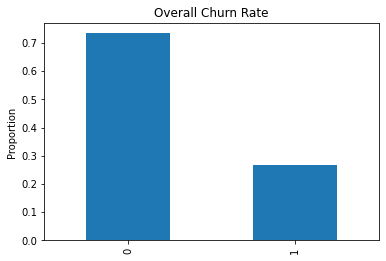

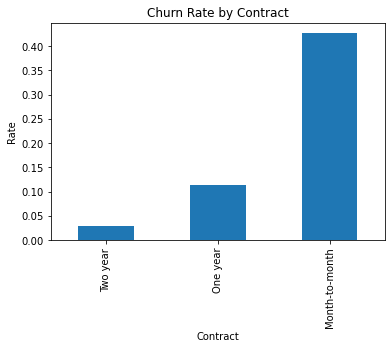

In [ ]:
# overall churn rate
df['ChurnFlag'].value_counts(normalize=True).plot(kind='bar')
plt.title('Overall Churn Rate'); plt.ylabel('Proportion'); plt.show()


### Insight 1 – Overall Churn Rate
Approximately **26 %** of customers have churned (`ChurnFlag = 1`).  
This is our baseline: any subgroup with a churn rate **> 26 %** is higher-than-average risk.